<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Codes_in_Evaluation/save_points_abril_23_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from skimage import filters
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
from sklearn.neural_network import MLPClassifier
import sklearn
from scipy import ndimage as ndi
from skimage import feature
from sklearn.externals import joblib
from skimage import measure

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/MarquesGabi_Routines


In [3]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

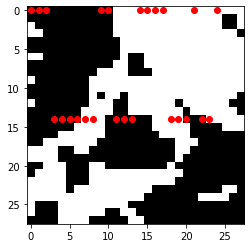

In [13]:
Size = 28
Imagem = 300
leap = 3
x = np.array(df.iloc[Imagem,:])
value =np.median(x)
kk =0 

for i in x:
  if x[kk] < value:
    x[kk] = 0
  else:
    x[kk] = 255
  kk = kk +1
''''''
resized = cv2.resize(x, (Size,Size))
#x = resized.copy()
Indice=resized.shape
N1=Indice[0]
N2=Indice[1]
Ref=80
t=[] 
w=[]
cont=0
j=int(N2/2)
for i in range(N1-leap):
  k = i+leap
  A=resized[i,j]
  B=resized[k,j]
  # print('A =',A,'B=',B)

  delta=abs(A-B)
  if(delta>Ref):
    w+=[14]
  else:
    w+=[0]
  t+=[cont]
  cont=cont+1

data=np.array(x).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)

plt.imshow(Foto,cmap = "gray")
plt.plot(t,w, 'o', color='red')

In [5]:
x[1]

0.0

In [6]:
N2

28

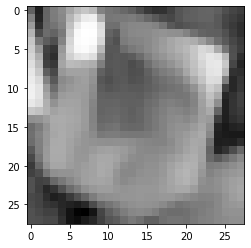

In [7]:
x = np.array(df.iloc[6,:])
Size=28

data=np.array(x).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
#data=np.array(x.reshape(Size,Size)
'''
data = cv2.resize(x, (Size,Size))
img =  Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)
img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(Size,Size)

''' 
plt.imshow(Foto, cmap = "gray")

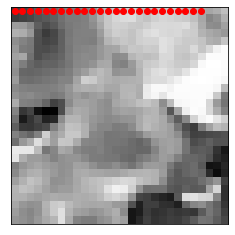

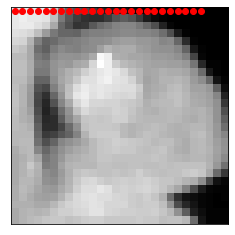

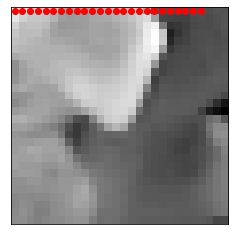

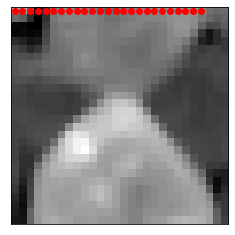

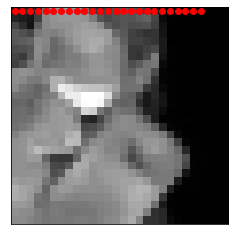

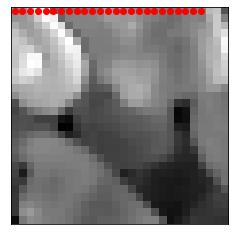

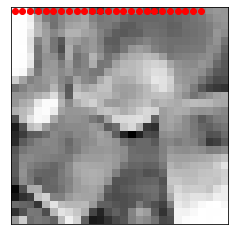

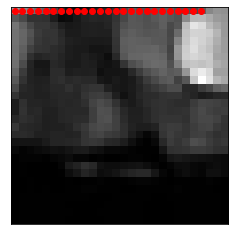

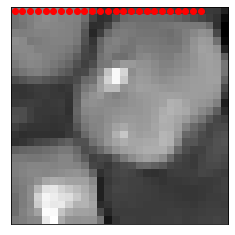

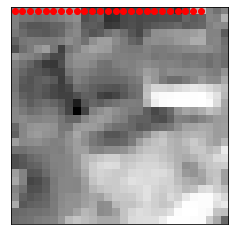

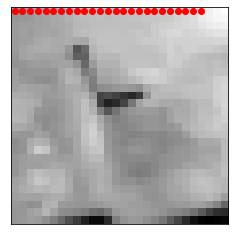

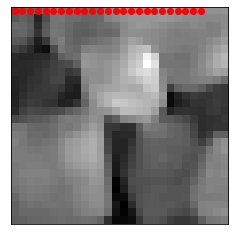

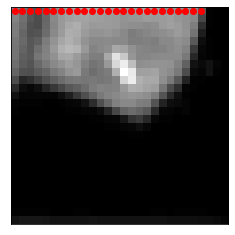

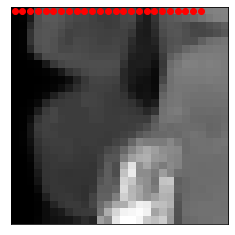

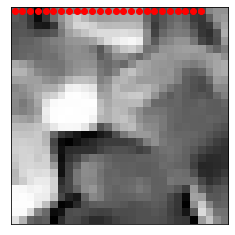

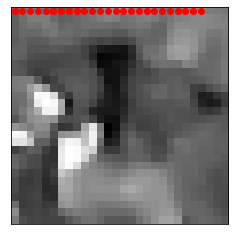

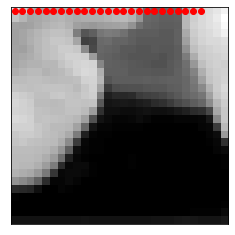

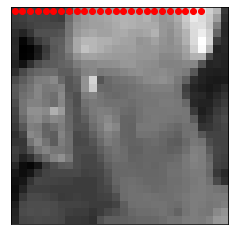

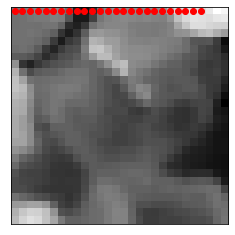

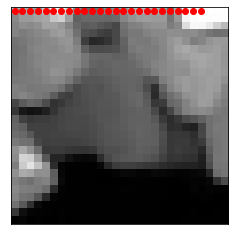

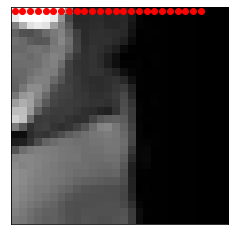

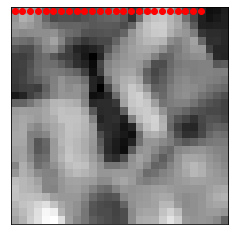

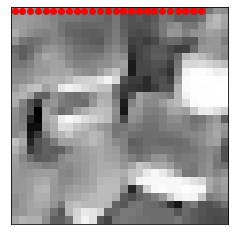

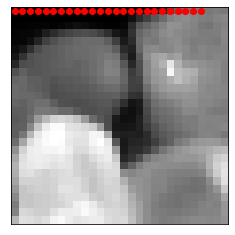

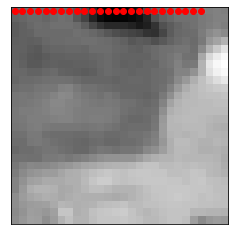

<Figure size 432x288 with 0 Axes>

In [8]:
Size = 28
Picture_Size = 25
#fig = plt.gcf()
#fig.set_size_inches(Picture_Size, Picture_Size)
Num = 25
for i in range(Num):
  ixx = i
  Size = 28
  Imagem = i + 300
  leap = 3
  x = np.array(df.iloc[Imagem,:])
  resized = cv2.resize(x, (Size,Size))
  #x = resized.copy()
  Indice=resized.shape
  N1=Indice[0]
  N2=Indice[1]
  Ref=100
  t=[] 
  w=[]
  cont=0
  j=int(N2/2)
  for ii in range(N1-leap):
    k = ii+leap
    A=resized[ii,j]
    B=resized[k,j]
    # print('A =',A,'B=',B)

    delta=abs(A-B)
    if(delta>Ref):
      w+=[14]
    else:
      w+=[0]
    t+=[cont]
    cont=cont+1

  data=np.array(df.iloc[Imagem ,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(Size,Size)
  #plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  plt.plot(t,w, 'o', color='red')
  plt.show()
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)

In [9]:
data

array([[ 45.35357,  47.04582,  48.62389,  48.75727,  47.82949,  46.14087,
         47.97444,  45.33293,  40.65989,  33.93731,  21.54321,   7.96333,
          4.04469,   3.79713,   5.93013,   9.44529,  14.14919,  36.3659 ,
         45.47516,  46.53376,  49.67637,  52.48363,  51.55387,  54.65482,
         56.33157,  55.07425,  56.86948,  55.12915],
       [ 44.06918,  45.59055,  47.02313,  47.39274,  45.49421,  47.68037,
         49.73051,  48.24529,  39.49996,  31.78321,  18.61331,   8.88038,
          5.43841,   4.42412,   5.65248,   7.68166,  10.09263,  18.43501,
         36.83667,  43.63652,  46.26419,  49.13497,  49.23629,  50.88   ,
         53.60173,  54.19304,  56.80037,  56.0648 ],
       [ 41.80869,  43.66775,  46.87069,  48.30102,  47.66744,  49.21542,
         49.16015,  49.61459,  47.65701,  41.86087,  32.23266,  25.26344,
         20.99009,  20.62639,  20.07274,  17.65837,  13.9203 ,  16.14261,
         24.20015,  37.01104,  41.7392 ,  45.40332,  48.49179,  50.6583 ,
      

In [10]:
w

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [11]:
x

array([ 45.35357,  47.04582,  48.62389,  48.75727,  47.82949,  46.14087,
        47.97444,  45.33293,  40.65989,  33.93731,  21.54321,   7.96333,
         4.04469,   3.79713,   5.93013,   9.44529,  14.14919,  36.3659 ,
        45.47516,  46.53376,  49.67637,  52.48363,  51.55387,  54.65482,
        56.33157,  55.07425,  56.86948,  55.12915,  44.06918,  45.59055,
        47.02313,  47.39274,  45.49421,  47.68037,  49.73051,  48.24529,
        39.49996,  31.78321,  18.61331,   8.88038,   5.43841,   4.42412,
         5.65248,   7.68166,  10.09263,  18.43501,  36.83667,  43.63652,
        46.26419,  49.13497,  49.23629,  50.88   ,  53.60173,  54.19304,
        56.80037,  56.0648 ,  41.80869,  43.66775,  46.87069,  48.30102,
        47.66744,  49.21542,  49.16015,  49.61459,  47.65701,  41.86087,
        32.23266,  25.26344,  20.99009,  20.62639,  20.07274,  17.65837,
        13.9203 ,  16.14261,  24.20015,  37.01104,  41.7392 ,  45.40332,
        48.49179,  50.6583 ,  53.48446,  55.75879, 

In [12]:
x

array([ 45.35357,  47.04582,  48.62389,  48.75727,  47.82949,  46.14087,
        47.97444,  45.33293,  40.65989,  33.93731,  21.54321,   7.96333,
         4.04469,   3.79713,   5.93013,   9.44529,  14.14919,  36.3659 ,
        45.47516,  46.53376,  49.67637,  52.48363,  51.55387,  54.65482,
        56.33157,  55.07425,  56.86948,  55.12915,  44.06918,  45.59055,
        47.02313,  47.39274,  45.49421,  47.68037,  49.73051,  48.24529,
        39.49996,  31.78321,  18.61331,   8.88038,   5.43841,   4.42412,
         5.65248,   7.68166,  10.09263,  18.43501,  36.83667,  43.63652,
        46.26419,  49.13497,  49.23629,  50.88   ,  53.60173,  54.19304,
        56.80037,  56.0648 ,  41.80869,  43.66775,  46.87069,  48.30102,
        47.66744,  49.21542,  49.16015,  49.61459,  47.65701,  41.86087,
        32.23266,  25.26344,  20.99009,  20.62639,  20.07274,  17.65837,
        13.9203 ,  16.14261,  24.20015,  37.01104,  41.7392 ,  45.40332,
        48.49179,  50.6583 ,  53.48446,  55.75879, 